In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import re

In [3]:
#reading files
df = pd.read_csv('HealthApp_2k.log_structured.csv')
templates = pd.read_csv('HealthApp_2k.log_templates.csv')
#getting info about the csv files
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


In [4]:
#cleaning data
df = df.drop('Pid', axis = 1)
df.head()
df.dropna(inplace=True)

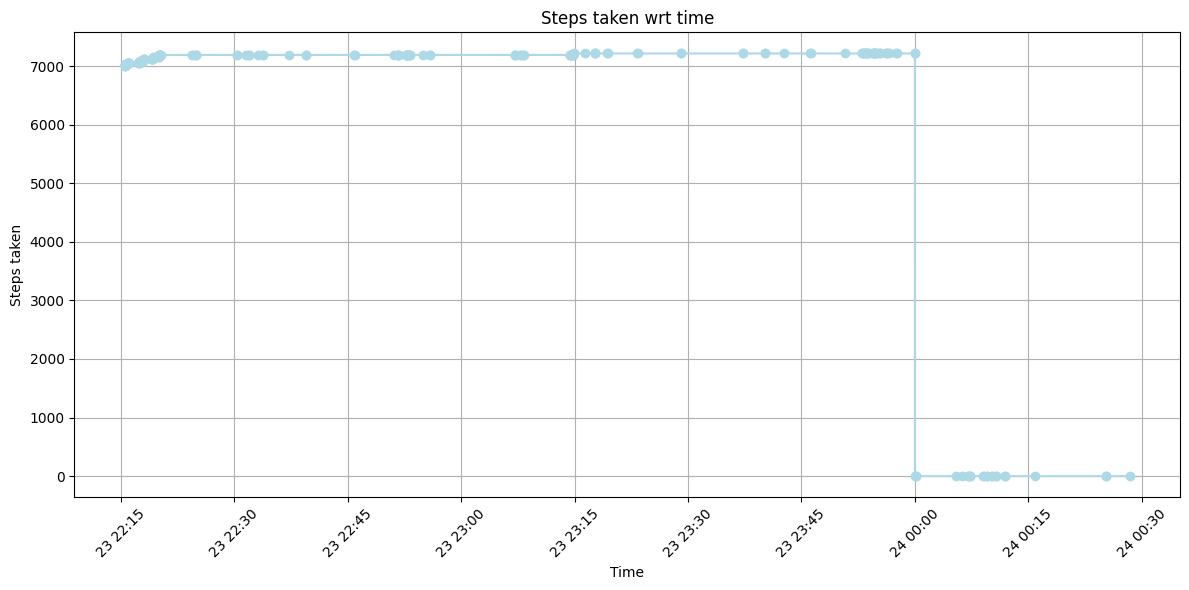

In [5]:
#E22 = getTodayTotalDetailSteps = <*>##<*>##<*>##<*>##<*>##<*>
df_e22 = df[df['EventId'] == 'E22'].copy()
# Convert the 'Time' column to datetime format
df_e22.loc[:, 'Time'] = pd.to_datetime(df_e22['Time'], format='%Y%m%d-%H:%M:%S:%f')

# Extracting numeric values enclosed in '##' from 'Content' and convert to integer
df_e22.loc[:, 'Steps'] = df_e22['Content'].str.extract(r'##(\d+)##')
df_e22.loc[:, 'Steps'] = df_e22['Steps'].astype(int)

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(df_e22['Time'], df_e22['Steps'], marker='o', linestyle='-' ,color='lightblue')
plt.title('Steps taken wrt time')
plt.xlabel('Time')
plt.ylabel('Steps taken')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
df_e22.head()

,LineId,Time,Component,Content,EventId,EventTemplate,Steps
5,6,2017-12-23 22:15:29.635000,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##699...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,6993
15,16,2017-12-23 22:15:29.950000,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7007
22,23,2017-12-23 22:15:30.632000,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7008
29,30,2017-12-23 22:15:31.142000,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7009
36,37,2017-12-23 22:15:32.145000,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##701...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7011


            Date Steps
5     2017-12-23  6993
15    2017-12-23  7007
22    2017-12-23  7008
29    2017-12-23  7009
36    2017-12-23  7011
...          ...   ...
1925  2017-12-24     0
1935  2017-12-24     0
1951  2017-12-24     0
1957  2017-12-24     0
1966  2017-12-24     0

[242 rows x 2 columns]


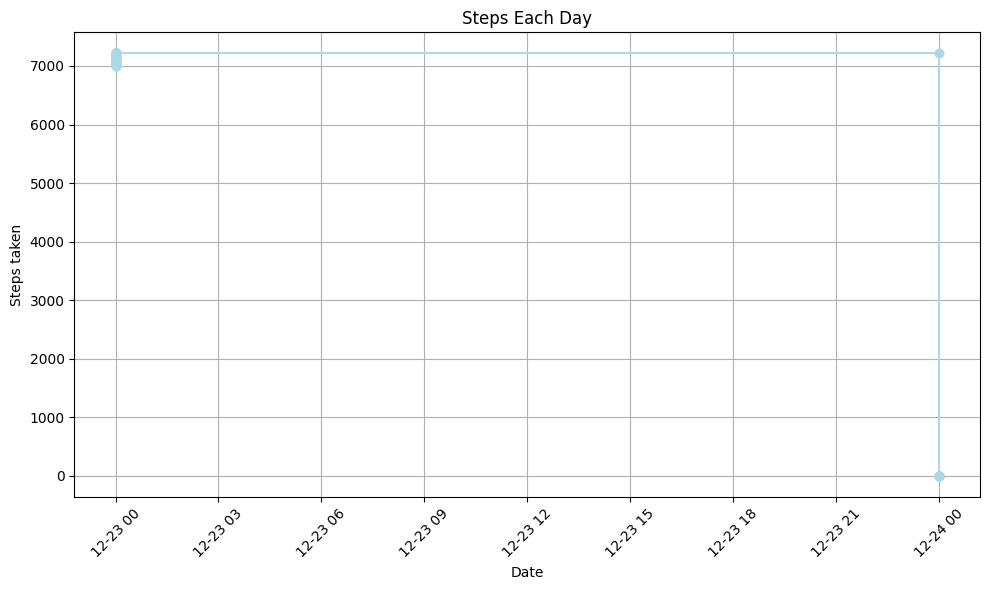

In [7]:

df_e22['Time'] = pd.to_datetime(df_e22['Time'], format='%Y%m%d-%H:%M:%S:%f')
df_e22.loc[:, 'Date'] = df_e22['Time'].dt.date

#printing total steps and date which are on 23 and 24
print(df_e22[['Date', 'Steps']])

#plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df_e22['Date'], df_e22['Steps'], marker='o', color='lightblue')  
plt.title('Steps Each Day')
plt.xlabel('Date')
plt.ylabel('Steps taken')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:

# Convert the "Time" column to a datetime format
df["Time"] = pd.to_datetime(df["Time"], format="%Y%m%d-%H:%M:%S:%f")

# Filter rows related to workouts
workout_df = df[df["EventTemplate"].str.contains("onStandStepChanged")]

workout_df = workout_df.copy()
workout_df.loc[:, "Date"] = workout_df["Time"].dt.date

# Calculate daily workout times
daily_workout_times = workout_df.groupby("Date")["Time"].count()

# Calculate daily step counts
step_df = df[df["Component"] == "Step_StandReportReceiver"]

# Create a copy to avoid SettingWithCopyWarning
step_df = step_df.copy()
step_df.loc[:, "Date"] = step_df["Time"].dt.date

# Replace missing values with zeros and then convert to integers
daily_step_counts = step_df["Content"].str.extract(r'REPORT : (\d+)')[0].fillna(0).astype(int).groupby(step_df["Date"]).sum()

# Calculate active times (hourly step counts)
active_times = df[df["Component"] == "Step_StandReportReceiver"]

# Create a copy to avoid SettingWithCopyWarning
active_times = active_times.copy()
active_times.loc[:, "Hour"] = active_times["Time"].dt.hour

hourly_active_counts = active_times["Content"].str.extract(r'REPORT : (\d+)')[0].fillna(0).astype(int).groupby(active_times["Hour"]).sum()

# Print the results
print("Daily Workout Times:")
print(daily_workout_times)

print("\nDaily Step Counts:")
print(daily_step_counts)

print("\nHourly Active Times:")
print(hourly_active_counts)


Daily Workout Times:
Date
2017-12-23    236
2017-12-24     24
Name: Time, dtype: int64

Daily Step Counts:
Date
2017-12-23    959380
2017-12-24         0
Name: 0, dtype: int32

Hourly Active Times:
Hour
0          0
22    822585
23    136795
Name: 0, dtype: int32


In [9]:
df_e22

,LineId,Time,Component,Content,EventId,EventTemplate,Steps,Date
5,6,2017-12-23 22:15:29.635,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##699...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,6993,2017-12-23
15,16,2017-12-23 22:15:29.950,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7007,2017-12-23
22,23,2017-12-23 22:15:30.632,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7008,2017-12-23
29,30,2017-12-23 22:15:31.142,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##700...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7009,2017-12-23
36,37,2017-12-23 22:15:32.145,Step_SPUtils,getTodayTotalDetailSteps = 1514038440000##701...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,7011,2017-12-23
...,...,...,...,...,...,...,...,...
1925,1926,2017-12-24 00:11:57.442,Step_SPUtils,getTodayTotalDetailSteps = 1514045400000##0##...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,0,2017-12-24
1935,1936,2017-12-24 00:15:53.285,Step_SPUtils,getTodayTotalDetailSteps = 1514045400000##0##...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,0,2017-12-24
1951,1952,2017-12-24 00:25:16.438,Step_SPUtils,getTodayTotalDetailSteps = 1514045640000##0##...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,0,2017-12-24
1957,1958,2017-12-24 00:25:17.438,Step_SPUtils,getTodayTotalDetailSteps = 1514046240000##0##...,E22,getTodayTotalDetailSteps = <*>##<*>##<*>##<*>#...,0,2017-12-24


In [10]:
#finding out about the workout session time with calories
df_e22['Date'] = df_e22['Time'].dt.date
df_e22['Hour'] = df_e22['Time'].dt.hour
df_e22['Minute'] = df_e22['Time'].dt.minute

steps_increase_threshold = 1000
min_duration_minutes = 30

workout_sessions = []
current_session = None

for index, row in df_e22.iterrows():
    if row['Steps'] > steps_increase_threshold:
        if current_session is None:
            current_session = {'start_time': row['Time']}
        else:
            current_session['end_time'] = row['Time']
    else:
        if current_session is not None:
            duration = (current_session['end_time'] - current_session['start_time']).total_seconds() / 60
            if duration >= min_duration_minutes:
                workout_sessions.append(current_session)
            current_session = None

if workout_sessions:
    print("Workout sessions timmings:")
    for session in workout_sessions:
        print(f"Start: {session['start_time']} - End: {session['end_time']}")

Workout sessions timmings:
Start: 2017-12-23 22:15:29.635000 - End: 2017-12-24 00:00:00.234000


In [11]:
# E4 calculateCaloriesWithCache totalCalories=<*>
df_e4 = df.loc[df['EventId'] == 'E4'].copy()

# Extract calories 
df_e4.loc[:, 'Calories'] = df_e4['Content'].str.extract(r'(\d+)')
df_e4.loc[:, 'Calories'] = df_e4['Calories'].astype(int)


df_e4.head(10)


,LineId,Time,Component,Content,EventId,EventTemplate,Calories
8,9,2017-12-23 22:15:29.645,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126775,E4,calculateCaloriesWithCache totalCalories=<*>,126775
17,18,2017-12-23 22:15:29.959,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126797,E4,calculateCaloriesWithCache totalCalories=<*>,126797
24,25,2017-12-23 22:15:30.639,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126818,E4,calculateCaloriesWithCache totalCalories=<*>,126818
31,32,2017-12-23 22:15:31.157,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126861,E4,calculateCaloriesWithCache totalCalories=<*>,126861
38,39,2017-12-23 22:15:32.156,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126882,E4,calculateCaloriesWithCache totalCalories=<*>,126882
45,46,2017-12-23 22:15:32.656,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126904,E4,calculateCaloriesWithCache totalCalories=<*>,126904
52,53,2017-12-23 22:15:33.148,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126925,E4,calculateCaloriesWithCache totalCalories=<*>,126925
59,60,2017-12-23 22:15:33.658,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126947,E4,calculateCaloriesWithCache totalCalories=<*>,126947
69,70,2017-12-23 22:15:35.200,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126989,E4,calculateCaloriesWithCache totalCalories=<*>,126989
80,81,2017-12-23 22:15:35.104,Step_ExtSDM,calculateCaloriesWithCache totalCalories=126989,E4,calculateCaloriesWithCache totalCalories=<*>,126989


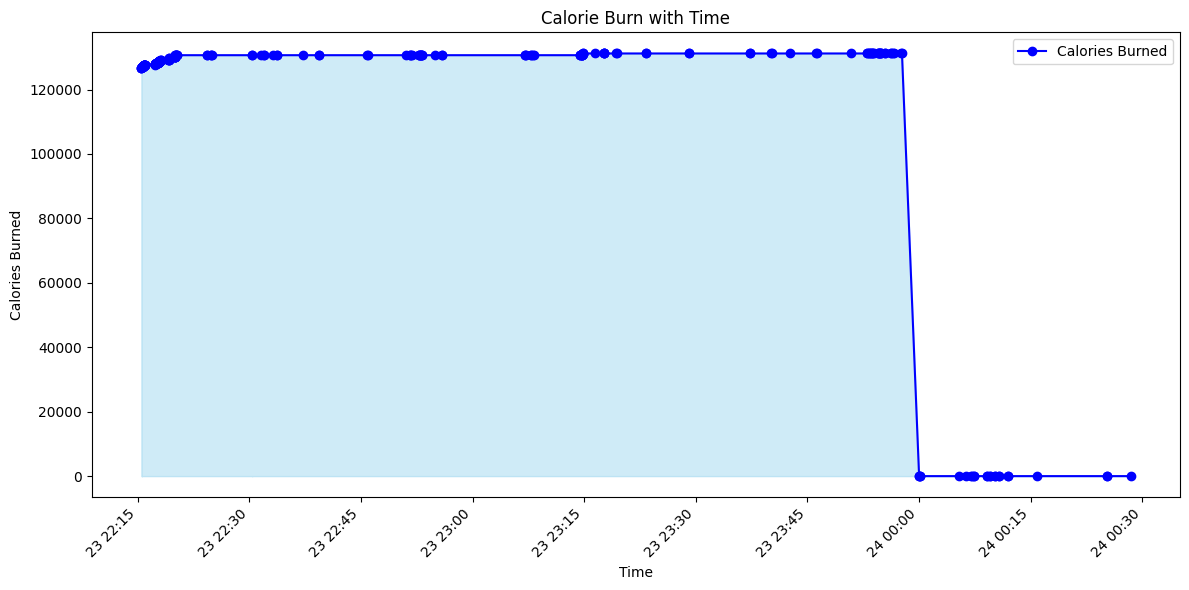

In [12]:
df_e4['Time'] = pd.to_datetime(df_e4['Time'], format='%Y%m%d-%H:%M:%S:%f')

# checking extracted calories type
df_e4['Calories'] = pd.to_numeric(df_e4['Calories'], errors='coerce')

# removing rows with no value
df_e4 = df_e4.dropna()

#plotting
plt.figure(figsize=(12, 6))

# Create an area plot
plt.fill_between(df_e4['Time'], df_e4['Calories'], color='skyblue', alpha=0.4)

plt.plot(df_e4['Time'], df_e4['Calories'], marker='o', color='b', label='Calories Burned')

plt.title('Calorie Burn with Time')
plt.xlabel('Time')
plt.ylabel('Calories Burned')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()


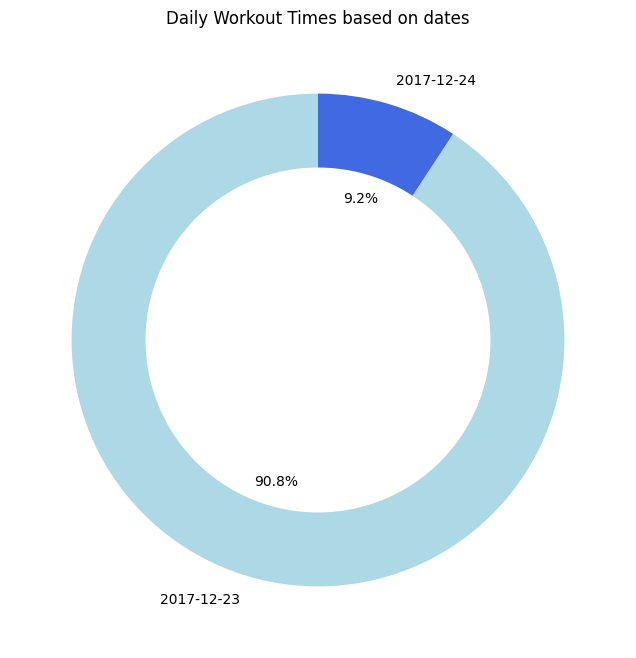

In [13]:
colors = ['#ADD8E6', '#4169E1']


plt.figure(figsize=(8, 8))

# Create a pie chart for daily workout times
plt.pie(daily_workout_times, labels=daily_workout_times.index, autopct='%1.1f%%', startangle=90, colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Setting title
plt.title('Daily Workout Times based on dates')

plt.show()


(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '22'), Text(2, 0, '23')])

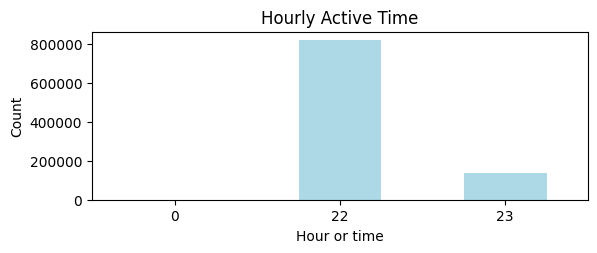

In [14]:
# Plot Hourly Active Times
plt.subplot(2, 1, 2)
hourly_active_counts.plot(kind='bar', color='lightblue')
plt.title('Hourly Active Time')
plt.xlabel('Hour or time')
plt.ylabel('Count')
plt.xticks(rotation=0)